In [1]:
## import data manipulation packages
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
from math import radians

## import dataset "medium size" as variable 'city' and drop NaN
cities = pd.read_excel('data/small_cities.xlsx')
ct = cities.dropna(axis = 'rows', how = 'any')
## considero solo al di sopra dell'equatore
## ct = ct[ct.lat >= 0]

In [2]:
#add london Start (spostando lievemente la longitudine, così che sia più ad est di London)
London_st = ct.loc[(ct['city'] == 'London') & (ct['iso3'] == 'GBR')]
London_st['city']='London_st' 
London_st['lng'] = London_st['lng'] + 0.2

<ipython-input-2-b81702dafba4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['city']='London_st'
<ipython-input-2-b81702dafba4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['lng'] = London_st['lng'] + 0.2


In [3]:
## attacco la riga London_st al dataframe
ct = ct.append(London_st)

In [4]:
## resetto l'index, che sia progressivo
ct = ct.reset_index()

In [5]:
## concatenate iso2 and city to get unique id
ct['ID'] = ct['city'].map(str) + ct['iso2'].map(str)

In [6]:
## drop not usable columns
ct = ct.drop(['city_ascii', 'country', 'iso2', 'admin_name', 'capital', 'id'], axis = 1)

In [7]:
## droppo la colonna index duplicata
ct = ct.drop('index', axis = 1)

In [8]:
# population - dove la popolazione è > di 200,000 abitanti aggiungo peso 2
pop = np.where(ct['population'] < 200000 , 0 , 2 )
#same state  - dove lo stato è diverso aggiungo peso 2
i = ct['iso3'].to_numpy()
st = (i[:, None ] != i) * 2

In [9]:
# direction - lavoro sulla longitudine e prendo le longitudini ad "est", normalizzando le long negative aggiungendo 150
## forse dobbiamo aggiungere 180? visto che dovrebbe essere su 360 totale?
dr_x = np.where(ct['lng']>= 0 , ct['lng'] , (ct['lng'] + 180) + 180)
x = dr_x
drdf = (x[:, None ] < x)*1

In [10]:
# metto i giusti indici alle matrici 
direction = pd.DataFrame(drdf, columns = ct['ID'], index = ct['ID'])
same_state = pd.DataFrame(st, columns = ct['ID'], index = ct['ID'])
population = pd.DataFrame(pop , index = ct['ID'])

In [11]:
direction

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
JakartaID,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0
DelhiIN,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0
MumbaiIN,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0
ManilaPH,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0
ShanghaiCN,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0
São PauloBR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
SeoulKR,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
Mexico CityMX,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [12]:
## coversion of coordinated in degrees to radians
ct['lat'] = np.radians(ct['lat'])
ct['lng'] = np.radians(ct['lng'])

In [13]:
## get the scipy metrics
dist = DistanceMetric.get_metric('haversine')

In [14]:
## prepare the array to get in input for the distance calculation
#non credo che serva 

#ct[['lat','lng']].to_numpy()

In [15]:
## pass pairwise function to get the distance / multiply for 6373 as earth sperical radius is 6373kms
#dist.pairwise(ct [['lat','lng']].to_numpy())*6373

In [16]:
#cerchiamo di avere meno dati 
D = np.where( direction > 0 , dist.pairwise(ct [['lat','lng']].to_numpy())*6373 , 0   )
## create the distance matrix with cities in the indexes
distance = pd.DataFrame(D, columns = ct['ID'], index = ct['ID'])
print(distance)

ID                  TokyoJP     JakartaID      DelhiIN     MumbaiIN  \
ID                                                                    
TokyoJP            0.000000      0.000000     0.000000     0.000000   
JakartaID       5787.903765      0.000000     0.000000     0.000000   
DelhiIN         5835.248502   5011.267565     0.000000     0.000000   
MumbaiIN        6736.368099   4662.287622  1166.997459     0.000000   
ManilaPH        2997.194340      0.000000     0.000000     0.000000   
ShanghaiCN      1762.022389      0.000000     0.000000     0.000000   
São PauloBR        0.000000      0.000000     0.000000     0.000000   
SeoulKR         1151.307887      0.000000     0.000000     0.000000   
Mexico CityMX      0.000000      0.000000     0.000000     0.000000   
GuangzhouCN     2903.800481      0.000000     0.000000     0.000000   
BeijingCN       2094.455505      0.000000     0.000000     0.000000   
CairoEG         9566.233300   8988.643865  4430.878464  4360.175097   
Kolkāt

In [17]:
from pandas import DataFrame
from tqdm import tqdm

In [18]:
tqdm.pandas()

/Users/dorianeve/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [19]:
## popolare per criteri (più vicino +2, secondo più vicino +4, terzo più vicino +8, il resto 'no go')
dis = distance.T.replace(0, 0)

In [20]:
dis = dis.replace(dis.progress_apply(lambda x: x[x > 0].min(axis=0)), 2)

100%|██████████| 20/20 [00:00<00:00, 1477.34it/s]


In [21]:
dis = dis.replace(dis.progress_apply(lambda x: x[x > 2].min(axis=0)), 4)

100%|██████████| 20/20 [00:00<00:00, 1805.05it/s]


In [22]:
dis = dis.replace(dis.progress_apply(lambda x: x[x > 4].min(axis=0)), 8)

100%|██████████| 20/20 [00:00<00:00, 1981.53it/s]


In [23]:
dis = dis.where((dis <= 8), 0) 
dis

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0.0,0.0,0.0,0.0,8.0,4.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JakartaID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DelhiIN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
MumbaiIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
ManilaPH,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0
ShanghaiCN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
São PauloBR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
SeoulKR,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico CityMX,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
graph =((dis + same_state + pop.T) * dis/dis)
## for i in dis :
    #graph[i] = (dis[i] + same_state[i] + pop.T) * dis[i] / dis[i]

graph = graph.where((graph > 1), 0) 
    
graph = graph.replace(np.nan,0)

graph

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0.0,0.0,0.0,0.0,12.0,8.0,0.0,6.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JakartaID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DelhiIN,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
MumbaiIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
ManilaPH,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0
ShanghaiCN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
São PauloBR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
SeoulKR,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico CityMX,8.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
## un tentativo con networkX (mi prende il peso minore però----)

import networkx as nx

In [65]:
## creo grafo con networkX direzionato da graph cheè matrice di adiacenza non simmetrica
D = nx.from_pandas_adjacency(graph, create_using = nx.DiGraph)

In [66]:
## visualizzo i nodi
D.nodes()

NodeView(('TokyoJP', 'JakartaID', 'DelhiIN', 'MumbaiIN', 'ManilaPH', 'ShanghaiCN', 'São PauloBR', 'SeoulKR', 'Mexico CityMX', 'GuangzhouCN', 'BeijingCN', 'CairoEG', 'KolkātaIN', 'MoscowRU', 'BangkokTH', 'Buenos AiresAR', 'ShenzhenCN', 'DhakaBD', 'LondonGB', 'London_stGB'))

In [67]:
D.edges()

OutEdgeView([('TokyoJP', 'ManilaPH'), ('TokyoJP', 'ShanghaiCN'), ('TokyoJP', 'SeoulKR'), ('TokyoJP', 'BeijingCN'), ('DelhiIN', 'MumbaiIN'), ('DelhiIN', 'MoscowRU'), ('MumbaiIN', 'CairoEG'), ('MumbaiIN', 'MoscowRU'), ('ManilaPH', 'JakartaID'), ('ManilaPH', 'GuangzhouCN'), ('ManilaPH', 'BangkokTH'), ('ManilaPH', 'ShenzhenCN'), ('ShanghaiCN', 'ManilaPH'), ('ShanghaiCN', 'GuangzhouCN'), ('ShanghaiCN', 'BeijingCN'), ('ShanghaiCN', 'ShenzhenCN'), ('São PauloBR', 'Mexico CityMX'), ('São PauloBR', 'Buenos AiresAR'), ('SeoulKR', 'ManilaPH'), ('SeoulKR', 'ShanghaiCN'), ('SeoulKR', 'BeijingCN'), ('Mexico CityMX', 'TokyoJP'), ('Mexico CityMX', 'SeoulKR'), ('GuangzhouCN', 'JakartaID'), ('GuangzhouCN', 'KolkātaIN'), ('GuangzhouCN', 'BangkokTH'), ('GuangzhouCN', 'DhakaBD'), ('BeijingCN', 'ShenzhenCN'), ('CairoEG', 'London_stGB'), ('KolkātaIN', 'DelhiIN'), ('KolkātaIN', 'MumbaiIN'), ('MoscowRU', 'CairoEG'), ('MoscowRU', 'London_stGB'), ('BangkokTH', 'DelhiIN'), ('BangkokTH', 'KolkātaIN'), ('BangkokTH'

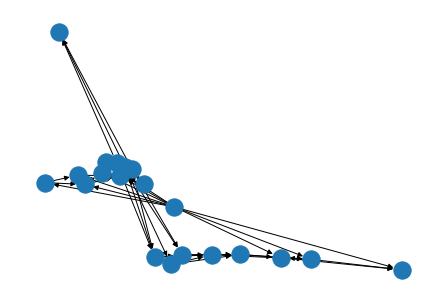

In [68]:
## visualizzo D grafo direzionato
nx.draw(D)

In [69]:
## link all'algoritmo usato
## https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra
length, path = nx.single_source_dijkstra(D, source = 'TokyoJP', target = 'London_GB')
print(length)
print(path)

NetworkXNoPath: No path to London_GB.